# What do we want to know from the data?
- Which country has the most number of Gold medals? 
- Olympic Participation based on Gender
- Who is the greatest Olympians? 
- Japanese Athletes

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [2]:
# Reading the dataset
df = pd.read_csv("Resources/summer.csv")

In [3]:
# Showing the first five rows of the dataset
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
# Check the size of the dataset
df.shape

(31165, 9)

In [5]:
# Check the data type of each column
df.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

# Cleaning Data

In [6]:
# Check if there is NaN value 
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

So, there are 4 NaNvalues in "Country" column.

In [7]:
# Assign "Unknown" in NaN values
df['Country'] = df['Country'].fillna("Unknown")

In [8]:
# DataFrame to see only the Country column is "Unknown"
df[df['Country'] == "Unknown"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,Unknown,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,Unknown,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,Unknown,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",Unknown,Men,Wf 60 KG,Silver


There are only 4 rows that are "Unknown". We can cleanup by dropping these rows.

In [9]:
df = df.drop(index=[29603,31072,31091,31110])

In [10]:
# Check if the rows with "Unknown" are not in the dataset.
df[df['Country'] == "Unknown"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [11]:
# Check NaN a
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [12]:
countries = df.Country.unique()

In [13]:
countries

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

RU1 is Not a valid country code. Should be replaced as "RUS"

In [14]:
df['Country'] = df['Country'].replace("RU1","RUS")

In [15]:
df[df['Country'] == "RU1"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


# Medal Distribution Of Top 10 Countries

In [16]:
# Grouping by "Country" and "Medal" and see the number of each Medal.
country_medal= df.groupby(['Country','Medal'])['Medal'].count().unstack()
country_medal.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0


In [17]:
top10_country = country_medal.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False).head(10)
top10_country

Medal,Bronze,Gold,Silver
Country,,,
USA,1098.0,2235.0,1252.0
URS,584.0,838.0,627.0
GBR,553.0,546.0,621.0
ITA,404.0,476.0,416.0
GER,475.0,452.0,378.0
HUN,351.0,412.0,316.0
FRA,497.0,408.0,491.0
SWE,328.0,349.0,367.0
GDR,225.0,329.0,271.0


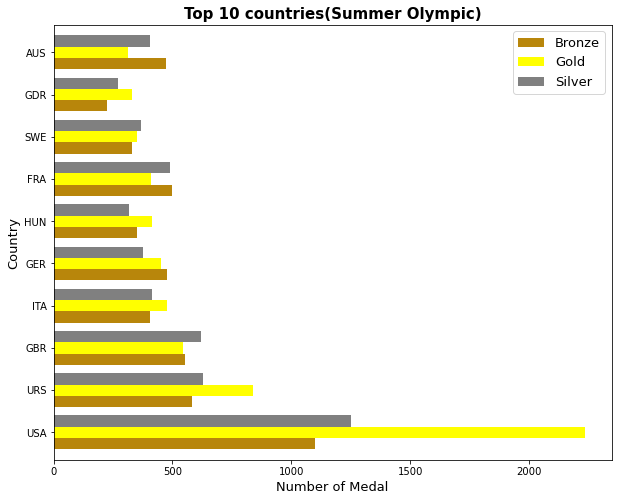

In [18]:
top10_country.plot(kind='barh', figsize=(10,8), width=0.8, color=['darkgoldenrod', 'yellow', 'grey'])
plt.title("Top 10 countries(Summer Olympic)", fontsize=15, fontweight='bold')
plt.xlabel("Number of Medal", fontsize=13)
plt.ylabel("Country", fontsize=13)
plt.legend(fontsize=13)
plt.show()

As we can see "United States" is the country that has the most number of Gold medal.

- USA(United States)
- URS(Soviet Union)
- GBR(Great Britain)
- ITA(Italy)
- GER(Germany)
- HUN(Hungary)
- FRA(France)
- SWE(Sweden)
- GDR(East Germany)
- AUS(Australia)

# Who is the greatest Olympian / Top 5 Athletes for Men and Women

In [19]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## Highest number of medal

In [20]:
# Eliminating "," in names
df['Athlete'] = df['Athlete'].str.replace(",", "")
df['Athlete'].head()

0         HAJOS Alfred
1      HERSCHMANN Otto
2     DRIVAS Dimitrios
3    MALOKINIS Ioannis
4    CHASAPIS Spiridon
Name: Athlete, dtype: object

In [21]:
men_most_num_medal = df[df['Gender'] == 'Men'].Athlete.value_counts().sort_values(ascending=False)[:1].index[0]
men_most_num_medal

'PHELPS Michael'

In [22]:
men_num_medal = df[df['Gender'] == 'Men'].Athlete.value_counts().sort_values(ascending=False)[0]
men_num_medal

22

In [23]:
women_most_num_medal = df[df['Gender'] == 'Women'].Athlete.value_counts().sort_values(ascending=False)[:1].index[0]
women_most_num_medal

'LATYNINA Larisa'

In [24]:
women_num_medal = df[df['Gender'] == 'Women'].Athlete.value_counts().sort_values(ascending=False)[0]
women_num_medal

18

In [25]:
# Answer for the Question
print(f"The Highest number of medal for men is {men_most_num_medal} with {men_num_medal} medals.")
print(f"The Highest number of medal for women is {women_most_num_medal} with {women_num_medal} medals.")

The Highest number of medal for men is PHELPS Michael with 22 medals.
The Highest number of medal for women is LATYNINA Larisa with 18 medals.


# Top 10 Athletes

In [26]:
men = df[df['Gender'] == 'Men']

In [27]:
men.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,HAJOS Alfred,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,HERSCHMANN Otto,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,DRIVAS Dimitrios,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,MALOKINIS Ioannis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,CHASAPIS Spiridon,GRE,Men,100M Freestyle For Sailors,Silver


In [28]:
men_medal = men.groupby(["Athlete","Medal"]).Medal.count().unstack()
men_medal

Medal,Bronze,Gold,Silver
Athlete,,,
AABYE Edgar,NaN,1.0,NaN
AALTONEN Arvo Ossian,2.0,NaN,NaN
AALTONEN Paavo Johannes,2.0,3.0,NaN
AANING Alf Lied,NaN,NaN,1.0
AARDEWIJN Pepijn,NaN,NaN,1.0
...,...,...,...
ÖSTERVOLD Jan Olsen,NaN,1.0,NaN
ÖSTERVOLD Kristian Olsen,NaN,1.0,NaN
ÖSTERVOLD Ole Olsen,NaN,1.0,NaN


In [29]:
men_medal = men_medal.sort_values(by=['Gold','Silver','Bronze'],ascending=False).head(10)
men_medal

Medal,Bronze,Gold,Silver
Athlete,,,
PHELPS Michael,2.0,18.0,2.0
NURMI Paavo,NaN,9.0,3.0
SPITZ Mark,1.0,9.0,1.0
LEWIS Carl,NaN,9.0,1.0
KATO Sawao,1.0,8.0,3.0
BIONDI Matthew,1.0,8.0,2.0
EWRY Ray,NaN,8.0,NaN
ANDRIANOV Nikolay,3.0,7.0,5.0
SHAKHLIN Boris,2.0,7.0,4.0


In [30]:
women = df[df["Gender"] == 'Women']
women.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,PRATT Daria,USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,ABBOTT Margaret Ives,USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,WHITTIER Pauline,USA,Women,Individual,Silver
639,1900,Paris,Tennis,Tennis,JONES Marion,ZZX,Women,Mixed Doubles,Bronze
640,1900,Paris,Tennis,Tennis,ROSENBAUM Hedwig,ZZX,Women,Mixed Doubles,Bronze


In [31]:
women_medal = women.groupby(["Athlete","Medal"]).Medal.count().unstack()
women_medal

Medal,Bronze,Gold,Silver
Athlete,,,
AAMODT Ragnhild,NaN,1.0,NaN
AARDENBURG Willemien,1.0,NaN,NaN
AARONES Ann Kristin,1.0,NaN,NaN
ABAKUMOVA Maria,NaN,NaN,1.0
ABASSOVA Tamilla,NaN,NaN,1.0
...,...,...,...
ZVONAREVA Vera,1.0,NaN,NaN
ZWEHL Julia,NaN,1.0,NaN
ZWIERS Claudia,1.0,NaN,NaN


In [32]:
women_medal = women_medal.sort_values(by=['Gold','Silver','Bronze'],ascending=False).head(10)
women_medal

Medal,Bronze,Gold,Silver
Athlete,,,
LATYNINA Larisa,4.0,9.0,5.0
FISCHER Birgit,NaN,8.0,4.0
THOMPSON Jenny,1.0,8.0,3.0
CASLAVSKA Vera,NaN,7.0,4.0
VEZZALI Valentina,2.0,6.0,1.0
OTTO Kristin,NaN,6.0,NaN
VAN DYKEN Amy,NaN,6.0,NaN
KELETI Agnes,2.0,5.0,3.0
COMANECI Nadia,1.0,5.0,3.0


No handles with labels found to put in legend.


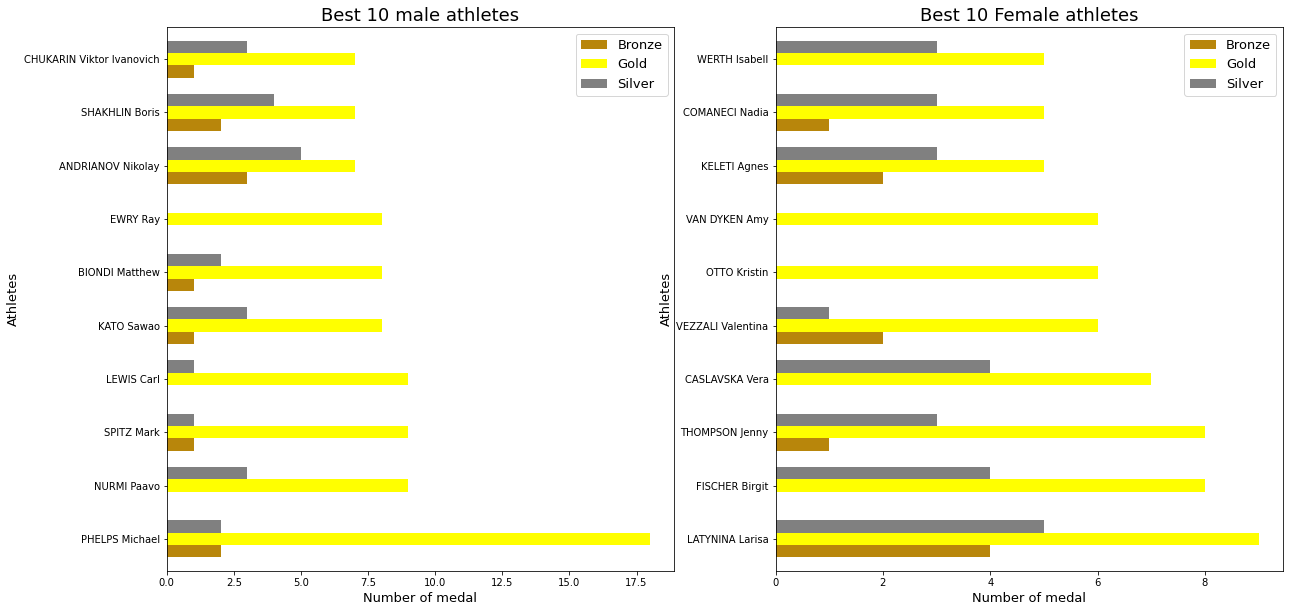

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

men_medal.plot(kind='barh',ax=ax[0], color=["darkgoldenrod", 'yellow', 'grey'], width=0.7)
plt.legend(fontsize=13)
ax[0].set_xlabel("Number of medal", fontsize=13)
ax[0].set_ylabel("Athletes", fontsize=13)
ax[0].set_title("Best 10 male athletes", fontsize=18)
ax[0].legend(fontsize=13)

women_medal.plot(kind='barh',ax=ax[1], color=["darkgoldenrod", 'yellow', 'grey'], width=0.7)
plt.legend(fontsize=13)
ax[1].set_xlabel("Number of medal", fontsize=13)
ax[1].set_ylabel("Athletes", fontsize=13)
ax[1].set_title("Best 10 Female athletes", fontsize=18)
ax[1].legend(fontsize=13)

plt.show()

# Olympic Participation based on Gender

In [34]:
# Check the dataset once again
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,HAJOS Alfred,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,HERSCHMANN Otto,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,DRIVAS Dimitrios,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,MALOKINIS Ioannis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,CHASAPIS Spiridon,GRE,Men,100M Freestyle For Sailors,Silver


In [35]:
# Grouping by "Year" and "Gender". See the number of participation for each Gender.
gender_participate = df.groupby(["Year","Gender"])["Gender"].count().unstack()
gender_participate

Gender,Men,Women
Year,,
1896,151.0,NaN
1900,501.0,11.0
1904,458.0,12.0
1908,789.0,15.0
1912,855.0,30.0
1920,1255.0,43.0
1924,833.0,51.0
1928,615.0,95.0
1932,555.0,60.0


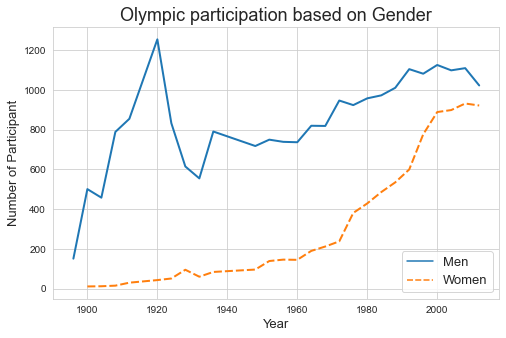

In [36]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.lineplot(data=gender_participate,linewidth=2)
plt.title("Olympic participation based on Gender", fontsize=18)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Participant", fontsize=13)
plt.legend(fontsize=13)

What we can see:

- Men's participation dropped suddenly around 1930 because of the world war.
- Women's participation has increased rapidly since 1970s. 

# Olympic  - Japan 

We are going to take a look at one specific country, "Japan".

- How many medals have the Japanese athletes won over time?
- Who is the greatest athlete?
- Which sport won the highest number of medal?

In [37]:
# Filtering data by Country == Japan
japan = df[df['Country'] == "JPN"]
japan.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4030,1920,Antwerp,Tennis,Tennis,KASHIO Seiichiro,JPN,Men,Doubles,Silver
4031,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Doubles,Silver
4046,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Singles,Silver
4971,1924,Paris,Wrestling,Wrestling Free.,NAITO Katsutoshi,JPN,Men,56 - 61KG (Featherweight),Bronze
5022,1928,Amsterdam,Aquatics,Swimming,TAKAISHI Katsuo,JPN,Men,100M Freestyle,Bronze


# How many medals have the Japanese athletes won over time?

In [38]:
num_medal = pd.DataFrame(japan.groupby("Year")['Medal'].count())
num_medal

,Medal
Year,
1920,3
1924,1
1928,8
1932,31
1936,21
1952,12
1956,24
1960,29
1964,64


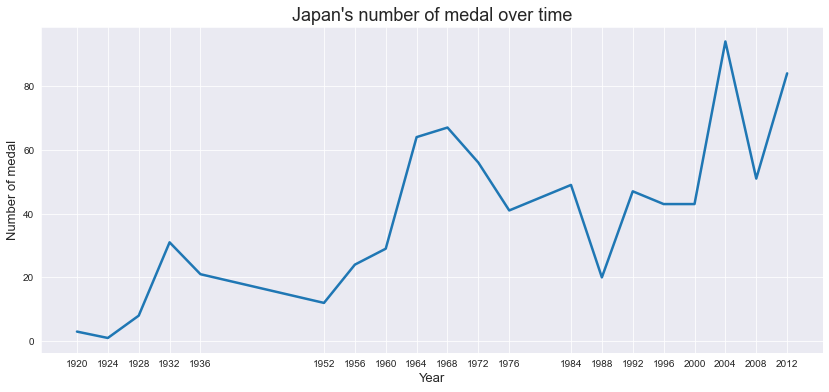

In [39]:
# Plotting
years = num_medal.index
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
sns.lineplot(x=num_medal.index, y='Medal', data=num_medal, linewidth=2.5)
plt.xlabel("Year", fontsize=13)
plt.xticks(years)
plt.ylabel("Number of medal", fontsize=13)
plt.title("Japan's number of medal over time", fontsize=18)
plt.show()

In [40]:
gender_JP = japan.groupby(["Year","Gender"])['Medal'].count().unstack()
gender_JP

Gender,Men,Women
Year,,
1920,3.0,NaN
1924,1.0,NaN
1928,7.0,1.0
1932,30.0,1.0
1936,20.0,1.0
1952,12.0,NaN
1956,24.0,NaN
1960,28.0,1.0
1964,46.0,18.0


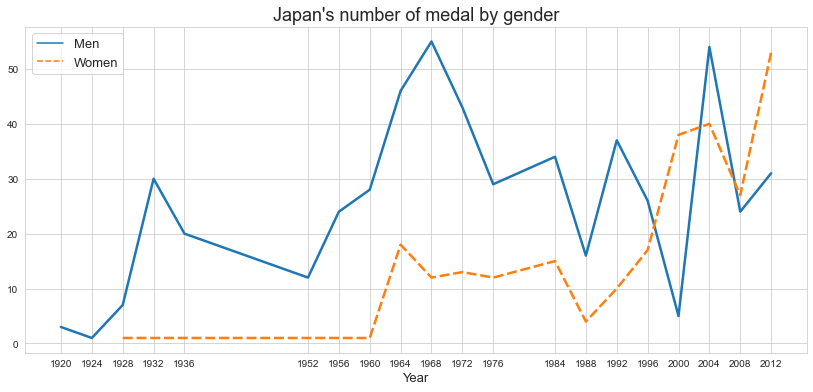

In [41]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.lineplot(data=gender_JP, linewidth=2.5)
plt.legend(fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.xticks(years)
plt.title("Japan's number of medal by gender", fontsize=18)
plt.show()

 # Who is the greatest athlete?

In [42]:
jp_men = japan[japan["Gender"]=='Men']
jp_men.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4030,1920,Antwerp,Tennis,Tennis,KASHIO Seiichiro,JPN,Men,Doubles,Silver
4031,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Doubles,Silver
4046,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Singles,Silver
4971,1924,Paris,Wrestling,Wrestling Free.,NAITO Katsutoshi,JPN,Men,56 - 61KG (Featherweight),Bronze
5022,1928,Amsterdam,Aquatics,Swimming,TAKAISHI Katsuo,JPN,Men,100M Freestyle,Bronze


In [43]:
men_greatest_jp = jp_men.groupby(['Athlete','Medal'])['Medal'].count().unstack()
men_greatest_jp = men_greatest_jp.sort_values(['Gold','Silver','Bronze'], ascending=False)
men_greatest_jp = men_greatest_jp[:1]

#Answer
men_greatest_jp

Medal,Bronze,Gold,Silver
Athlete,,,
KATO Sawao,1.0,8.0,3.0


In [44]:
jp_women = japan[japan["Gender"]=='Women']
jp_women.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5162,1928,Amsterdam,Athletics,Athletics,HITOMI Kinue,JPN,Women,800M,Silver
5746,1932,Los Angeles,Aquatics,Swimming,MAEHATA Hideko,JPN,Women,200M Breaststroke,Silver
6360,1936,Berlin,Aquatics,Swimming,MAEHATA Hideko,JPN,Women,200M Breaststroke,Gold
9807,1960,Rome,Aquatics,Swimming,TANAKA Satoko,JPN,Women,100M Backstroke,Bronze
11314,1964,Tokyo,Gymnastics,Artistic G.,ABUKAWA-CHIBA Ginko,JPN,Women,Team Competition,Bronze


In [45]:
women_greatest_jp = jp_men.groupby(['Athlete','Medal'])['Medal'].count().unstack()
women_greatest_jp = men_greatest_jp.sort_values(['Gold','Silver','Bronze'], ascending=False)
women_greatest_jp = men_greatest_jp[:1]

#Answer
women_greatest_jp

Medal,Bronze,Gold,Silver
Athlete,,,
KATO Sawao,1.0,8.0,3.0


# Timeline of number of medal each sport won over time

In [46]:
japan.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4030,1920,Antwerp,Tennis,Tennis,KASHIO Seiichiro,JPN,Men,Doubles,Silver
4031,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Doubles,Silver
4046,1920,Antwerp,Tennis,Tennis,KUMAGAE Ichiya,JPN,Men,Singles,Silver
4971,1924,Paris,Wrestling,Wrestling Free.,NAITO Katsutoshi,JPN,Men,56 - 61KG (Featherweight),Bronze
5022,1928,Amsterdam,Aquatics,Swimming,TAKAISHI Katsuo,JPN,Men,100M Freestyle,Bronze


In [47]:
sport_japan = japan.groupby(['Year', 'Sport'])['Medal'].count()
sport_japan = sport_japan.unstack()
sport_japan.head()

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Boxing,Cycling,Equestrian,Fencing,Football,...,Judo,Sailing,Shooting,Softball,Table Tennis,Taekwondo,Tennis,Volleyball,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,,,,,,,
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1928,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,15.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,14.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


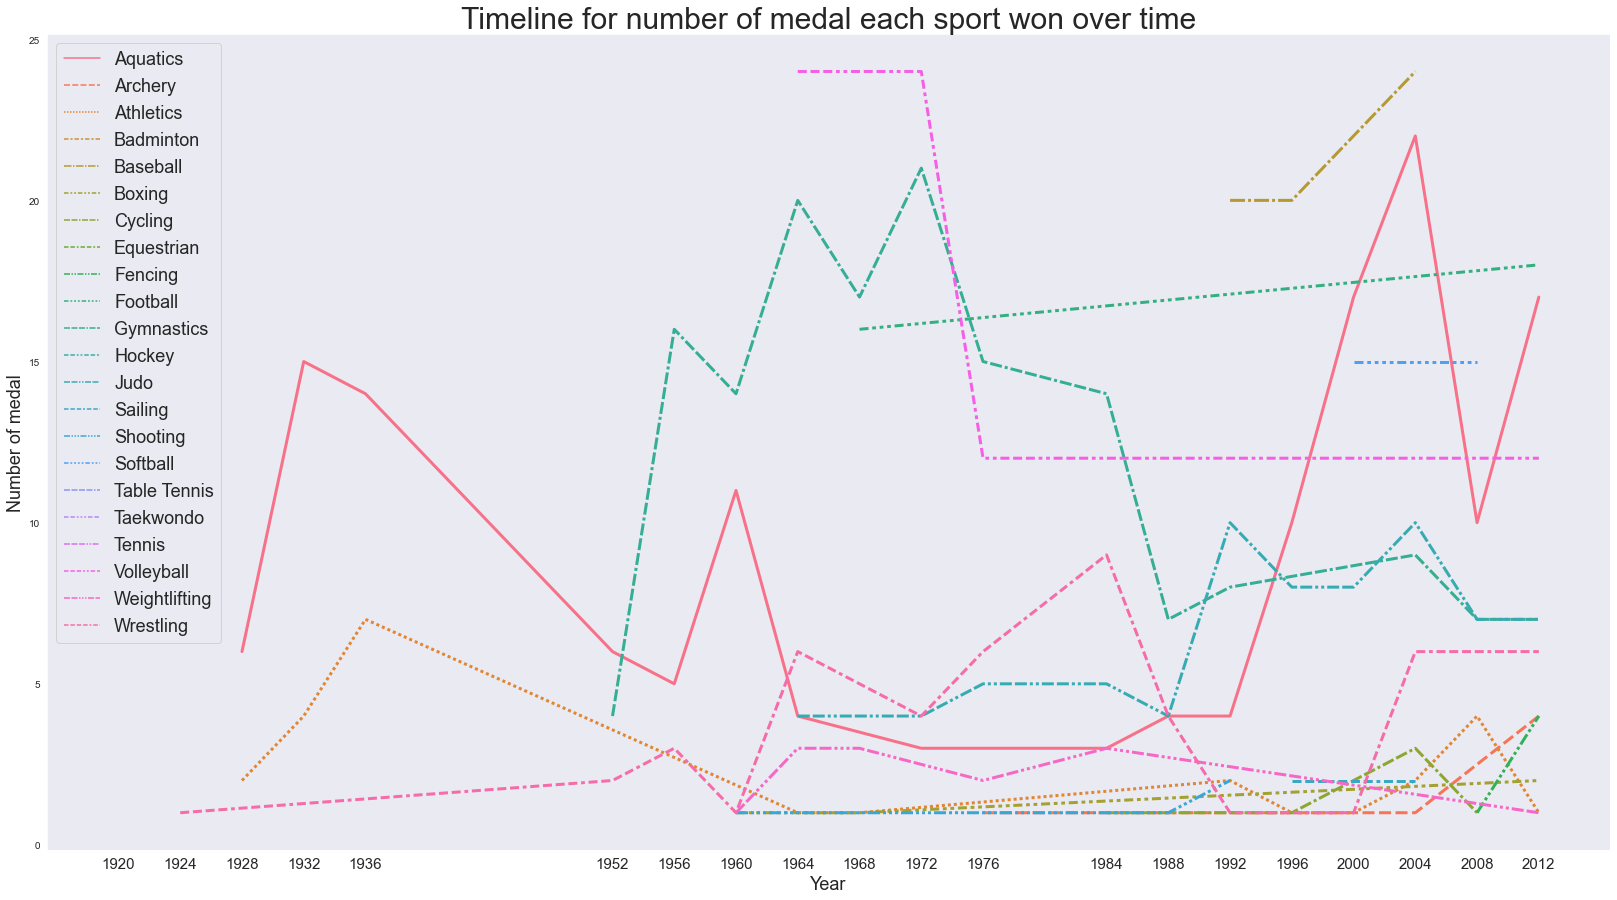

In [48]:
years = sport_japan.index
plt.figure(figsize=(28,15))
sns.set_style("darkgrid")
sns.lineplot(data=sport_japan, linewidth=3)
plt.legend(fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of medal", fontsize=18)
plt.xticks(years, fontsize=15)
plt.grid(axis='both')
plt.title("Timeline for number of medal each sport won over time", fontsize=30)
plt.show()

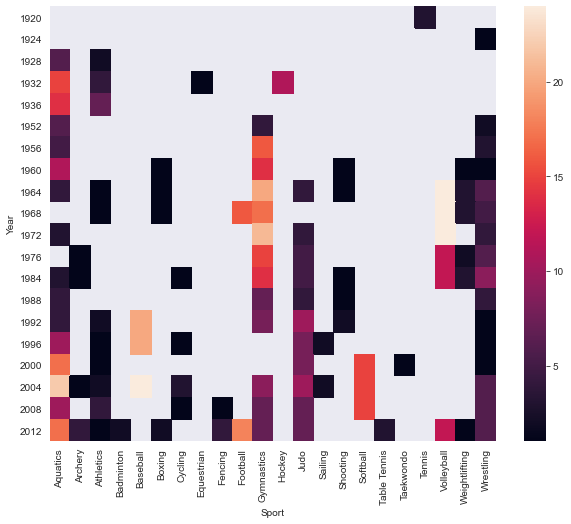

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data=sport_japan)
plt.show()